# Word embeddings using gensim

## Loading the model

In [16]:
#first install gensim e.g. via "mamba install gensim"

In [1]:
import numpy as np
import math

In [48]:
# load dataset/model 
import gensim.downloader as api
# see https://github.com/piskvorky/gensim-data
# for choice of model
embedd = api.load('glove-wiki-gigaword-50')
# embedd = api.load('glove-twitter-25')

In [49]:
def restrict_embedd(w2v, restricted_word_set, min_word_length=2, max_word_length=10):
    new_index_to_key = []
    new_key_to_index = {}
    new_vectors = []
    for ind, word in enumerate(w2v.index_to_key):
        if (not word in restricted_word_set) and len(word) >= min_word_length and len(word) <= max_word_length:
            new_key_to_index[word] = len(new_index_to_key)
            new_index_to_key.append(word)
            new_vectors.append(w2v.vectors[ind])
    w2v.index_to_key = new_index_to_key
    w2v.key_to_index = new_key_to_index
    w2v.vectors = np.array(new_vectors)



In [50]:
# most common words
restrict_embedd(embedd, ["'s", "''"])
NWORDS=len(embedd)
N = 50
print(f'The database contains (after pruning) {NWORDS} words.')
print(f'The {N} most common ones are: \n')
for index, word in enumerate(embedd.index_to_key):
    if index == N:
        break
    print(f"word #{index}/{len(embedd.index_to_key)} is {word}")


The database contains (after pruning) 350799 words.
The 50 most common ones are: 

word #0/350799 is the
word #1/350799 is of
word #2/350799 is to
word #3/350799 is and
word #4/350799 is in
word #5/350799 is for
word #6/350799 is that
word #7/350799 is on
word #8/350799 is is
word #9/350799 is was
word #10/350799 is said
word #11/350799 is with
word #12/350799 is he
word #13/350799 is as
word #14/350799 is it
word #15/350799 is by
word #16/350799 is at
word #17/350799 is from
word #18/350799 is his
word #19/350799 is ``
word #20/350799 is an
word #21/350799 is be
word #22/350799 is has
word #23/350799 is are
word #24/350799 is have
word #25/350799 is but
word #26/350799 is were
word #27/350799 is not
word #28/350799 is this
word #29/350799 is who
word #30/350799 is they
word #31/350799 is had
word #32/350799 is which
word #33/350799 is will
word #34/350799 is their
word #35/350799 is or
word #36/350799 is its
word #37/350799 is one
word #38/350799 is after
word #39/350799 is new
word #

## Cosine similarity, most similar words

In [51]:
# look at some vectors

In [52]:
king = embedd['king']; king

array([ 0.50451 ,  0.68607 , -0.59517 , -0.022801,  0.60046 , -0.13498 ,
       -0.08813 ,  0.47377 , -0.61798 , -0.31012 , -0.076666,  1.493   ,
       -0.034189, -0.98173 ,  0.68229 ,  0.81722 , -0.51874 , -0.31503 ,
       -0.55809 ,  0.66421 ,  0.1961  , -0.13495 , -0.11476 , -0.30344 ,
        0.41177 , -2.223   , -1.0756  , -1.0783  , -0.34354 ,  0.33505 ,
        1.9927  , -0.04234 , -0.64319 ,  0.71125 ,  0.49159 ,  0.16754 ,
        0.34344 , -0.25663 , -0.8523  ,  0.1661  ,  0.40102 ,  1.1685  ,
       -1.0137  , -0.21585 , -0.15155 ,  0.78321 , -0.91241 , -1.6106  ,
       -0.64426 , -0.51042 ], dtype=float32)

In [53]:
queen = embedd['queen']; queen

array([ 0.37854  ,  1.8233   , -1.2648   , -0.1043   ,  0.35829  ,
        0.60029  , -0.17538  ,  0.83767  , -0.056798 , -0.75795  ,
        0.22681  ,  0.98587  ,  0.60587  , -0.31419  ,  0.28877  ,
        0.56013  , -0.77456  ,  0.071421 , -0.5741   ,  0.21342  ,
        0.57674  ,  0.3868   , -0.12574  ,  0.28012  ,  0.28135  ,
       -1.8053   , -1.0421   , -0.19255  , -0.55375  , -0.054526 ,
        1.5574   ,  0.39296  , -0.2475   ,  0.34251  ,  0.45365  ,
        0.16237  ,  0.52464  , -0.070272 , -0.83744  , -1.0326   ,
        0.45946  ,  0.25302  , -0.17837  , -0.73398  , -0.20025  ,
        0.2347   , -0.56095  , -2.2839   ,  0.0092753, -0.60284  ],
      dtype=float32)

In [54]:
# What is the female counterpart of a king?
embedd.most_similar(positive=['king', 'woman'], 
                             negative=['man'])

[('queen', 0.8523604273796082),
 ('throne', 0.7664334177970886),
 ('prince', 0.7592144012451172),
 ('daughter', 0.7473883628845215),
 ('elizabeth', 0.7460219860076904),
 ('princess', 0.7424570322036743),
 ('kingdom', 0.7337412238121033),
 ('monarch', 0.721449077129364),
 ('eldest', 0.7184861898422241),
 ('widow', 0.7099431157112122)]

In [55]:
# What is the female counterpart of a king?
embedd.most_similar(positive=['king', 'she'], 
                             negative=['he'])

[('queen', 0.879991352558136),
 ('princess', 0.8010349869728088),
 ('daughter', 0.7692949771881104),
 ('elizabeth', 0.767657458782196),
 ('prince', 0.7667238116264343),
 ('uncle', 0.738310694694519),
 ('mother', 0.7349600791931152),
 ('aunt', 0.7316499352455139),
 ('son', 0.7305317521095276),
 ('lady', 0.7275319695472717)]

In [56]:
embedd.most_similar(positive=['doctor', 'she'], 
                             negative=['he'])

[('nurse', 0.8434410095214844),
 ('mother', 0.7978049516677856),
 ('child', 0.7920326590538025),
 ('woman', 0.7831878066062927),
 ('pregnant', 0.7726936936378479),
 ('girl', 0.7672077417373657),
 ('her', 0.7481821775436401),
 ('patient', 0.7464373707771301),
 ('boy', 0.7313278913497925),
 ('learns', 0.7268911600112915)]

In [57]:
def cos_sim(u, v):
    return np.inner(u,v)/math.sqrt(np.inner(u,u)*np.inner(v,v))

In [58]:
# project on this axis for gender bias
he = embedd['he']; she = embedd['she'] ; gbias = he - she; gbias

array([-0.261302  , -0.438481  ,  0.13376004, -0.12281001, -0.00838   ,
       -0.64455   , -0.13150996, -0.01198   , -0.73557   ,  0.04754001,
        0.04260999,  0.23386998, -0.56951   , -0.24359   , -0.29471004,
       -0.152461  ,  0.44637996, -0.08563   , -0.66735   ,  0.20257801,
       -0.28133   , -0.71557   , -0.04014999, -0.42204   , -0.63574   ,
       -0.11930013,  0.429694  , -0.216301  , -0.08826   ,  0.5115    ,
        0.28599977, -0.227249  , -0.25811   , -0.18074998,  0.22733   ,
        0.15184401,  0.13196   ,  0.14411998, -0.01708999,  0.62810004,
       -0.124465  ,  0.16902   , -0.62446666,  0.53734   , -0.379254  ,
        0.3373    , -0.38487598,  0.92383   ,  0.019064  , -0.435641  ],
      dtype=float32)

In [59]:
doctor = embedd['doctor']
sim = embedd.most_similar(positive=['doctor'], 
                             negative=[])
for li in sim:
    word = li[0]
    print(f'{word} is {cos_sim(doctor,embedd[word])} similar to doctor.')

nurse is 0.7977496777647489 similar to doctor.
physician is 0.7965211591055051 similar to doctor.
patient is 0.7611691340228203 similar to doctor.
child is 0.755893738561101 similar to doctor.
teacher is 0.7538283512557397 similar to doctor.
surgeon is 0.7479071795905597 similar to doctor.
doctors is 0.7393607058950945 similar to doctor.
father is 0.7334106401611019 similar to doctor.
mother is 0.7284410435938768 similar to doctor.
she is 0.7281813557181285 similar to doctor.


## Genderdness for words

In [60]:
def genderness(word):
    return cos_sim(embedd[word], embedd['he'] - embedd['she'])

In [61]:
[genderness(_) for _ in ['he', 'man', 'king', 'beard']]

[0.17669018921772683,
 -0.0759546247262612,
 0.11793255256397168,
 -0.11279480255299033]

In [62]:
[genderness(_) for _ in ['she', 'woman', 'queen', 'pink']]

[-0.3014023502580305,
 -0.4019534575008965,
 -0.3114308307117062,
 -0.30173915446792415]

In [63]:
N = 5
glist = [ (word, genderness(word)) for index, word in enumerate(embedd.index_to_key)]
glist[:N]

[('the', 0.2157683615819542),
 ('of', 0.1376989176026331),
 ('to', 0.12531179022375147),
 ('and', 0.05365547233778015),
 ('in', 0.1617873422279208)]

In [64]:
sglist = sorted(glist, key=lambda foo: foo[1])


In [65]:
# most female words
N = 75
sglist[:N]

[('mulleavy', -0.7006985315544474),
 ('mandrell', -0.675704004621733),
 ('monheit', -0.668710296489365),
 ('mehretu', -0.6631638297738612),
 ('wiedlin', -0.648022452907506),
 ('streb', -0.6446613680196839),
 ('medrich', -0.6427991526776876),
 ('mcgarrigle', -0.6426385625417351),
 ('herdahl', -0.6382342004626715),
 ('fozzard', -0.6321265907192541),
 ('miscarries', -0.6317290736688587),
 ('pavlova', -0.6313723975012049),
 ('arkhipova', -0.6232624127449452),
 ('schorpen', -0.6220365711602908),
 ('kuppinger', -0.6218319863919527),
 ('voluptuous', -0.6156876496819695),
 ('lactating', -0.6144926237812198),
 ('siberry', -0.6115365967594316),
 ('anle', -0.6105483085820074),
 ('ivanovna', -0.6104895752796777),
 ('melua', -0.6072749017493507),
 ('hollaback', -0.6072176443341113),
 ('mononoke', -0.6066046005672917),
 ('meiselas', -0.6055032264273342),
 ('cutrufello', -0.6029877730267844),
 ('clabber', -0.6005202080920384),
 ('annie', -0.5996489224384548),
 ('marling', -0.5988145224790686),
 ('qui

In [66]:
# male words
sglist[-N:]

[('giants', 0.4664218258224307),
 ('nla', 0.46674315217764684),
 ('olympiakos', 0.46850295397407726),
 ('arl', 0.4686324101086549),
 ('goodell', 0.4693520523067219),
 ('all-seater', 0.4697422245000497),
 ('raiders', 0.46978847220830133),
 ('rams', 0.46991194761090505),
 ('decimal', 0.47035914243798155),
 ('steelers', 0.4704709081323434),
 ('td', 0.47119263111271936),
 ('covenanter', 0.47133804758514075),
 ('sonics', 0.47198366388873),
 ('delian', 0.4735424873119514),
 ('huskers', 0.4736557286893722),
 ('rangers', 0.4752321334018177),
 ('bucs', 0.4772416789451398),
 ('sack', 0.4774244724680948),
 ('formio', 0.47820421078111597),
 ('colts', 0.47845576084601854),
 ('pro-treaty', 0.4787262327607465),
 ('20-horse', 0.47882021722643786),
 ('cgt', 0.4789646647673948),
 ('hvo', 0.48117312365712117),
 ('fatimid', 0.4818402181782809),
 ('ayyubids', 0.4823288988402379),
 ('admirals', 0.48320431063103975),
 ('defensive', 0.4837984833926378),
 ('chargers', 0.4844255181893741),
 ('keynes', 0.4844388

In [67]:
## Correlation between word length and absolute genderness

In [68]:
#correlation length of words to gender bias
N = len(embedd)
gbias = embedd['he'] - embedd['she']
gbiaslen = math.sqrt(np.inner(gbias,gbias))
len2bias = [] 
x = []
y = []
for index, word in enumerate(embedd.index_to_key):
    if index == N:
        break
    s= embedd[word] 
    slen = math.sqrt(np.inner(s,s))
    abscossim = abs(np.inner(s,gbias))/(slen*gbiaslen)
    wlen = len(word)
    len2bias.append((wlen,abscossim))
    x.append(wlen)
    y.append(abscossim)



In [69]:
x=np.array(x)
y=np.array(y)
A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, y,rcond=None)[0]

In [70]:
m,c

(0.0008556162843836167, 0.11246029717438245)

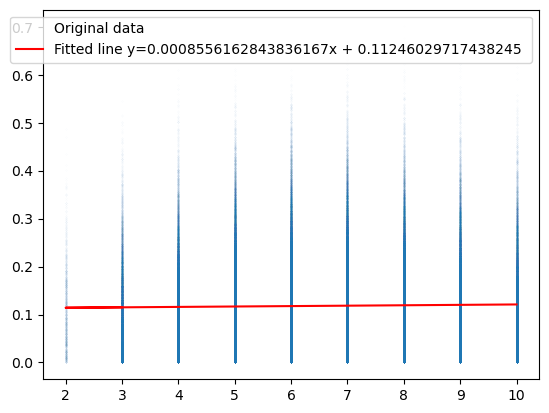

In [71]:
import matplotlib.pyplot as plt

_ = plt.plot(x, y, 'o', label='Original data', markersize=0.01)

_ = plt.plot(x, m*x + c, 'r', label=f'Fitted line y={m}x + {c} ')

_ = plt.legend()

plt.show()

In [72]:
#correlation frequence of words to absolute gender bias

In [73]:
N = len(embedd)
gbias = embedd['he'] - embedd['she']
gbiaslen = math.sqrt(np.inner(gbias,gbias))
freq2bias = []
x = []
y = []
for index, word in enumerate(embedd.index_to_key):
    if index == N:
        break
    s= embedd[word] 
    slen = math.sqrt(np.inner(s,s))
    abscossim = abs(np.inner(s,gbias))/(slen*gbiaslen)
    wfreq = embedd.get_vecattr(word, "count")/NWORDS  # returns count of "my-word"
    freq2bias.append((wfreq,abscossim))
    x.append(wfreq)
    y.append(abscossim)

In [74]:
x=np.array(x)
y=np.array(y)
A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, y,rcond=None)[0]

In [75]:
m,c

(0.0100842002542793, 0.11167271111146165)

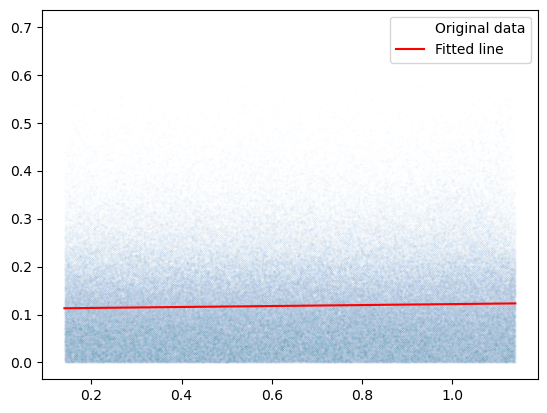

In [76]:
import matplotlib.pyplot as plt

_ = plt.plot(x, y, 'o', label='Original data', markersize=0.01)

_ = plt.plot(x, m*x + c, 'r', label='Fitted line')

_ = plt.legend()

plt.show()


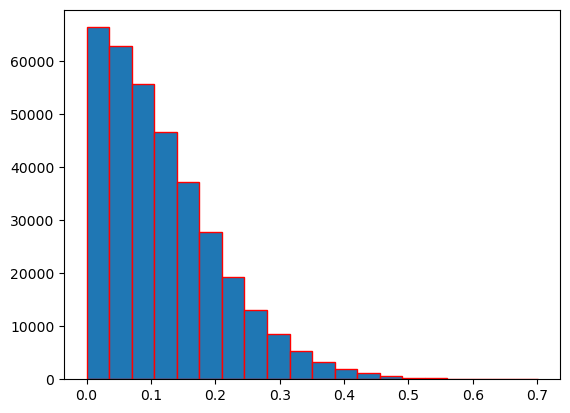

In [77]:
import matplotlib.pyplot as plt 
plt.hist(y, edgecolor="red", bins=20) 
plt.show() 